Streaming output truncated to the last 5000 lines.
drive/My Drive/UTKFace/25_1_2_20170116175320721.jpg.chip.jpg
drive/My Drive/UTKFace/25_1_1_20170113180645637.jpg.chip.jpg
drive/My Drive/UTKFace/25_1_1_20170112235032674.jpg.chip.jpg
drive/My Drive/UTKFace/25_1_0_20170109213201198.jpg.chip.jpg
drive/My Drive/UTKFace/25_1_3_20170104234854715.jpg.chip.jpg
drive/My Drive/UTKFace/25_1_2_20170116223140371.jpg.chip.jpg
drive/My Drive/UTKFace/25_1_3_20170119172014464.jpg.chip.jpg
drive/My Drive/UTKFace/25_1_3_20170117152035011.jpg.chip.jpg
drive/My Drive/UTKFace/25_1_2_20170116175222886.jpg.chip.jpg
drive/My Drive/UTKFace/25_1_0_20170117141421609.jpg.chip.jpg
drive/My Drive/UTKFace/25_1_0_20170116223905448.jpg.chip.jpg
drive/My Drive/UTKFace/25_1_2_20170104022809304.jpg.chip.jpg
drive/My Drive/UTKFace/25_0_3_20170119171120578.jpg.chip.jpg
drive/My Drive/UTKFace/25_1_0_20170116220813532.jpg.chip.jpg
drive/My Drive/UTKFace/25_1_0_20170103180835288.jpg.chip.jpg
drive/My Drive/UTKFace/25_1_1_2017

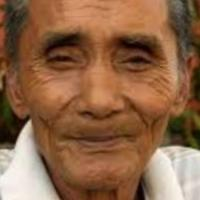


Image after preprocessing:


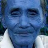

age: 78
gender: 0

Image before preprocessing:


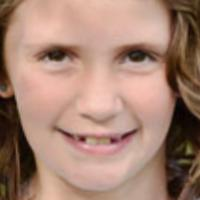


Image after preprocessing:


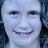

age: 8
gender: 1

Now let's look at the distribution of dataset.....


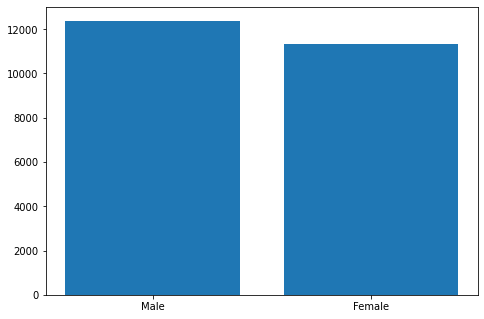

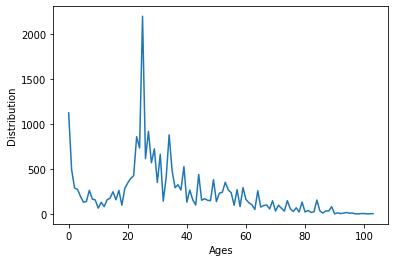

Shape of images_f_2: (23718, 48, 48, 3)

-----X_train and Y_train statistics-----
X_train shape: (11859, 48, 48, 3)
X_train shape[0]: (48, 48, 3)
X_train[0]: [[[0.18431373 0.18823529 0.18039216]
  [0.23137255 0.21176471 0.2       ]
  [0.30588235 0.25098039 0.24705882]
  ...
  [0.29803922 0.25490196 0.27843137]
  [0.31372549 0.2745098  0.30980392]
  [0.3254902  0.29411765 0.3372549 ]]

 [[0.20392157 0.2        0.18823529]
  [0.25490196 0.22745098 0.21568627]
  [0.32156863 0.26666667 0.25882353]
  ...
  [0.29411765 0.25098039 0.2745098 ]
  [0.30588235 0.26666667 0.30196078]
  [0.31764706 0.29019608 0.3254902 ]]

 [[0.21568627 0.2        0.18431373]
  [0.26666667 0.23137255 0.21568627]
  [0.34509804 0.27843137 0.25882353]
  ...
  [0.28627451 0.24313725 0.26666667]
  [0.29019608 0.25490196 0.27843137]
  [0.30588235 0.27843137 0.30588235]]

 ...

 [[0.18431373 0.16470588 0.17254902]
  [0.16470588 0.16470588 0.15686275]
  [0.17647059 0.16078431 0.14901961]
  ...
  [0.2627451  0.21568627 0.23

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

fldr="drive/My Drive/UTKFace"

import os
files=os.listdir(fldr)

import cv2 #OpenCV-Python is a library of Python bindings designed to solve computer vision problems
ages=[]
genders=[]
images=[]
original_images = []

# Data Preprocessing
for fle in files:
  age=int(fle.split('_')[0])
  gender=int(fle.split('_')[1])
  total=fldr+'/'+fle #image path
  print(total)
  image=cv2.imread(total) #reading the image from the given path
  original_images.append(image)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #method is used to convert an image from one color space to another.
  image= cv2.resize(image,(48,48))
  images.append(image)


for fle in files:
  age=int(fle.split('_')[0])
  gender=int(fle.split('_')[1])
  ages.append(age)
  genders.append(gender)

from google.colab.patches import cv2_imshow
print("Image before preprocessing:")
cv2_imshow(original_images[24])
print()
print("Image after preprocessing:")
cv2_imshow(images[24])
print("age:", ages[24])
print("gender:", genders[24])

print()
print("Image before preprocessing:")
cv2_imshow(original_images[0])
print()
print("Image after preprocessing:")
cv2_imshow(images[0])
print("age:", ages[0])
print("gender:", genders[0])

# Observing the data distributions

import numpy as np
images_f=np.array(images)
genders_f=np.array(genders)
ages_f=np.array(ages)

#np.save(fldr+'image.npy',images_f)
#np.save(fldr+'gender.npy',genders_f)
#np.save(fldr+'age.npy',ages_f)

# Checking distribution of gender in dataset
print()
print("Now let's look at the distribution of dataset.....")
values, counts = np.unique(genders_f, return_counts=True) 
#values -> what all different values are present
#counts -> what is the total count of all the different values

import matplotlib.pyplot as plt
% matplotlib inline
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
gender = ['Male', 'Female']
ax.bar(gender,counts)
plt.show()

# Checking distribution of age in dataset
values, counts = np.unique(ages_f, return_counts=True)

val=values.tolist()
cnt=counts.tolist()

plt.plot(counts)
plt.xlabel('Ages')
plt.ylabel('Distribution')
plt.show()

# Creating labels list for training data labels = [[age,gender], [age,gender], [age,gender],.....]
labels=[]

i=0
while i<len(ages):
  label=[]
  label.append([ages[i]])
  label.append([genders[i]])
  labels.append(label)
  i+=1

# creating numpy arrays of labels and images

labels_f=np.array(labels)
images_f=np.array(images)
images_f_2=images_f/255 # normalizing images
print("Shape of images_f_2:",images_f_2.shape)


import tensorflow as tf
from sklearn.model_selection import train_test_split

# train - test split
X_train, X_test, Y_train, Y_test= train_test_split(images_f_2, labels_f,test_size=0.5)

print()
print("-----X_train and Y_train statistics-----")
print("X_train shape:", X_train.shape)
print("X_train shape[0]:", X_train[0].shape)
print("X_train[0]:", X_train[0])
print()
print("Y_train shape:", Y_train.shape)
print("Y_train shape[0]:", Y_train[0].shape)
print("Y_train[0]:", Y_train[0])

Y_train_2=[Y_train[:,1],Y_train[:,0]]
Y_test_2=[Y_test[:,1],Y_test[:,0]]

# Model
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten,BatchNormalization
from tensorflow.keras.layers import Dense, MaxPooling2D,Conv2D
from tensorflow.keras.layers import Input,Activation,Add
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

def Convolution(input_tensor,filters):
    
    #This layer creates a convolution kernel that is convolved with the layer input to produce a tensor of outputs.
    #filters - number of filters applied
    # kernel size - width and height of filter
    x = Conv2D(filters=filters,kernel_size=(3, 3),padding = 'same',strides=(1, 1),kernel_regularizer=l2(0.001))(input_tensor)
    #The Dropout layer randomly sets input units to 0 with a frequency of rate at each step during training time, which helps prevent overfitting.
    x = Dropout(0.1)(x) 
    x= Activation('relu')(x)

    return x

def model(input_shape):
  inputs = Input((input_shape))
  
  conv_1= Convolution(inputs,32)
  maxp_1 = MaxPooling2D(pool_size = (2,2)) (conv_1)
  conv_2 = Convolution(maxp_1,64)
  maxp_2 = MaxPooling2D(pool_size = (2, 2)) (conv_2)
  conv_3 = Convolution(maxp_2,128)
  maxp_3 = MaxPooling2D(pool_size = (2, 2)) (conv_3)
  conv_4 = Convolution(maxp_3,256)
  maxp_4 = MaxPooling2D(pool_size = (2, 2)) (conv_4)
  flatten= Flatten() (maxp_4)
  dense_1= Dense(64,activation='relu')(flatten)
  dense_2= Dense(64,activation='relu')(flatten)
  drop_1=Dropout(0.2)(dense_1)
  drop_2=Dropout(0.2)(dense_2)
  output_1= Dense(1,activation="sigmoid",name='sex_out')(drop_1)
  output_2= Dense(1,activation="relu",name='age_out')(drop_2)
  model = Model(inputs=[inputs], outputs=[output_1,output_2])
  model.compile(loss=["binary_crossentropy","mae"], optimizer="Adam", metrics=["accuracy"])
  
  return model

Model=model((48,48,3))

Model.summary()

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow as tf

fle_s='drive/My Drive/Age_sex_detection.h5'
checkpointer = ModelCheckpoint(fle_s, monitor='val_loss',verbose=1,save_best_only=True,save_weights_only=False, mode='auto',save_freq='epoch')
Early_stop=tf.keras.callbacks.EarlyStopping(patience=75, monitor='val_loss',restore_best_weights=True),
callback_list=[checkpointer,Early_stop]

History=Model.fit(X_train,Y_train_2,batch_size=64,validation_data=(X_test,Y_test_2),epochs=50, callbacks=[callback_list])
#print(history.history.keys())
print("------------------")
#print(history.history)

Epoch 1/50
186/186 [==============================] - 113s 601ms/step - loss: 19.2279 - sex_out_loss: 0.7323 - age_out_loss: 18.2825 - sex_out_accuracy: 0.5138 - age_out_accuracy: 0.0447 - val_loss: 18.2262 - val_sex_out_loss: 0.6927 - val_age_out_loss: 17.3823 - val_sex_out_accuracy: 0.5161 - val_age_out_accuracy: 0.0481

Epoch 00001: val_loss improved from inf to 18.22618, saving model to drive/My Drive/Age_sex_detection.h5
Epoch 2/50
186/186 [==============================] - 112s 600ms/step - loss: 16.3122 - sex_out_loss: 0.6924 - age_out_loss: 15.4684 - sex_out_accuracy: 0.5289 - age_out_accuracy: 0.0489 - val_loss: 16.5854 - val_sex_out_loss: 0.6909 - val_age_out_loss: 15.7250 - val_sex_out_accuracy: 0.5161 - val_age_out_accuracy: 0.0481

Epoch 00002: val_loss improved from 18.22618 to 16.58539, saving model to drive/My Drive/Age_sex_detection.h5
Epoch 3/50
186/186 [==============================] - 112s 603ms/step - loss: 14.6876 - sex_out_loss: 0.6715 - age_out_loss: 13.8327 - 

NameError: ignored

371/371 [==============================] - 21s 56ms/step - loss: 8.1957 - sex_out_loss: 0.2851 - age_out_loss: 7.1902 - sex_out_accuracy: 0.8746 - age_out_accuracy: 0.0481


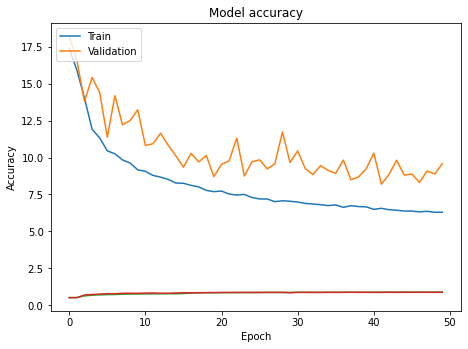

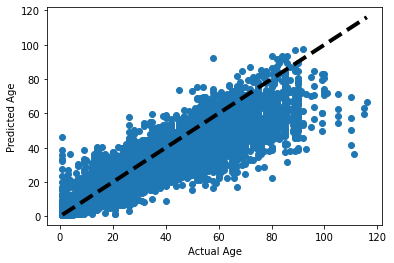

              precision    recall  f1-score   support

           0       0.83      0.94      0.89      6120
           1       0.93      0.80      0.86      5739

    accuracy                           0.87     11859
   macro avg       0.88      0.87      0.87     11859
weighted avg       0.88      0.87      0.87     11859



In [ ]:
Model.load_weights(fle_s)
Model.evaluate(X_test,Y_test_2)

pred=Model.predict(X_test)

plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.subplots_adjust(top=1.00, bottom=0.0, left=0.0, right=0.95, hspace=0.25, wspace=0.35)

plt.plot(History.history['sex_out_accuracy'])
plt.plot(History.history['val_sex_out_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.subplots_adjust(top=1.00, bottom=0.0, left=0.0, right=0.95, hspace=0.25, wspace=0.35)

fig, ax = plt.subplots()
ax.scatter(Y_test_2[1], pred[1])
ax.plot([Y_test_2[1].min(),Y_test_2[1].max()], [Y_test_2[1].min(), Y_test_2[1].max()], 'k--', lw=4)
ax.set_xlabel('Actual Age')
ax.set_ylabel('Predicted Age')
plt.show()

i=0
Pred_l=[]
while(i<len(pred[0])):

  Pred_l.append(int(np.round(pred[0][i])))
  i+=1

from sklearn.metrics import confusion_matrix 

from sklearn.metrics import classification_report
report=classification_report(Y_test_2[0], Pred_l)
print(report)

In [ ]:


# For webcam
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  #display(Image(filename))
  from google.colab.patches import cv2_imshow
  import cv2
  img = cv2.imread(filename, cv2.IMREAD_UNCHANGED)
  cv2_imshow(img)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #method is used to convert an image from one color space to another.
  img= cv2.resize(img,(48,48))
  imgs = [img]
  final_imgs_f=np.array(imgs)
  final_imgs_f_2=final_imgs_f/255 # normalizing images
  final_pred = Model.predict(final_imgs_f_2)
  pred_age = final_pred[1][0]
  pred_gender = final_pred[0][0]
  print("Age:",pred_age)
  print("Gender:",pred_gender)
  #images.append(img)
  #print(Model.predict(Image(filename)))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  #format - 20_1_2_20170120134921760.jpg.chip.jpg
  print(str(err))


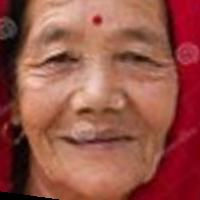

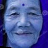

[[86], [1]]
Age: [62.337055]
Gender: [0.16043061]



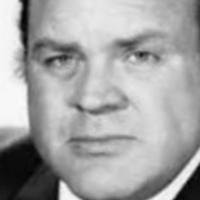

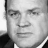

[[50], [0]]
Age: [48.526936]
Gender: [0.00032341]



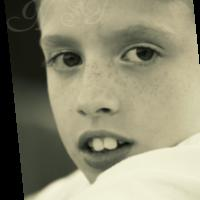

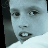

[[9], [0]]
Age: [6.5407324]
Gender: [0.41852865]


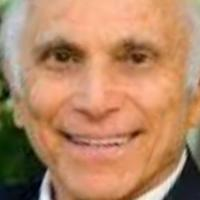

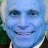

[[61], [0]]
Age: [52.872402]
Gender: [0.08357197]


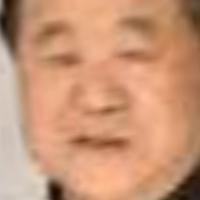

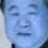

[[61], [0]]
Age: [34.088097]
Gender: [0.00460181]


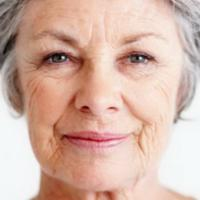

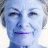

[[80], [1]]
Age: [50.82089]
Gender: [0.92534715]


In [ ]:
#Demo
demo_img = images[69]
cv2_imshow(original_images[69])
cv2_imshow(demo_img)
demo_img = cv2.cvtColor(demo_img, cv2.COLOR_BGR2RGB) #method is used to convert an image from one color space to another.
demo_img= cv2.resize(demo_img,(48,48))
demo_imgs = [demo_img]
demo_final_imgs_f=np.array(demo_imgs)
demo_final_imgs_f_2=demo_final_imgs_f/255 # normalizing images
demo_final_pred = Model.predict(demo_final_imgs_f_2)
demo_pred_age = demo_final_pred[1][0]
demo_pred_gender =demo_final_pred[0][0]
print(labels[69])
print("Age:",demo_pred_age)
print("Gender:",demo_pred_gender)
print()

#---------

demo_img = images[4579]
cv2_imshow(original_images[4579])
cv2_imshow(demo_img)
demo_img = cv2.cvtColor(demo_img, cv2.COLOR_BGR2RGB) #method is used to convert an image from one color space to another.
demo_img= cv2.resize(demo_img,(48,48))
demo_imgs = [demo_img]
demo_final_imgs_f=np.array(demo_imgs)
demo_final_imgs_f_2=demo_final_imgs_f/255 # normalizing images
demo_final_pred = Model.predict(demo_final_imgs_f_2)
demo_pred_age = demo_final_pred[1][0]
demo_pred_gender =demo_final_pred[0][0]
print(labels[4579])
print("Age:",demo_pred_age)
print("Gender:",demo_pred_gender)
print()

#---------

demo_img = images[49]
cv2_imshow(original_images[49])
cv2_imshow(demo_img)
demo_img = cv2.cvtColor(demo_img, cv2.COLOR_BGR2RGB) #method is used to convert an image from one color space to another.
demo_img= cv2.resize(demo_img,(48,48))
demo_imgs = [demo_img]
demo_final_imgs_f=np.array(demo_imgs)
demo_final_imgs_f_2=demo_final_imgs_f/255 # normalizing images
demo_final_pred = Model.predict(demo_final_imgs_f_2)
demo_pred_age = demo_final_pred[1][0]
demo_pred_gender =demo_final_pred[0][0]
print(labels[49])
print("Age:",demo_pred_age)
print("Gender:",demo_pred_gender)

#---------

demo_img = images[2000]
cv2_imshow(original_images[2000])
cv2_imshow(demo_img)
demo_img = cv2.cvtColor(demo_img, cv2.COLOR_BGR2RGB) #method is used to convert an image from one color space to another.
demo_img= cv2.resize(demo_img,(48,48))
demo_imgs = [demo_img]
demo_final_imgs_f=np.array(demo_imgs)
demo_final_imgs_f_2=demo_final_imgs_f/255 # normalizing images
demo_final_pred = Model.predict(demo_final_imgs_f_2)
demo_pred_age = demo_final_pred[1][0]
demo_pred_gender =demo_final_pred[0][0]
print(labels[2000])
print("Age:",demo_pred_age)
print("Gender:",demo_pred_gender)

#---------

demo_img = images[2100]
cv2_imshow(original_images[2100])
cv2_imshow(demo_img)
demo_img = cv2.cvtColor(demo_img, cv2.COLOR_BGR2RGB) #method is used to convert an image from one color space to another.
demo_img= cv2.resize(demo_img,(48,48))
demo_imgs = [demo_img]
demo_final_imgs_f=np.array(demo_imgs)
demo_final_imgs_f_2=demo_final_imgs_f/255 # normalizing images
demo_final_pred = Model.predict(demo_final_imgs_f_2)
demo_pred_age = demo_final_pred[1][0]
demo_pred_gender =demo_final_pred[0][0]
print(labels[2100])
print("Age:",demo_pred_age)
print("Gender:",demo_pred_gender)

#---------

demo_img = images[129]
cv2_imshow(original_images[129])
cv2_imshow(demo_img)
demo_img = cv2.cvtColor(demo_img, cv2.COLOR_BGR2RGB) #method is used to convert an image from one color space to another.
demo_img= cv2.resize(demo_img,(48,48))
demo_imgs = [demo_img]
demo_final_imgs_f=np.array(demo_imgs)
demo_final_imgs_f_2=demo_final_imgs_f/255 # normalizing images
demo_final_pred = Model.predict(demo_final_imgs_f_2)
demo_pred_age = demo_final_pred[1][0]
demo_pred_gender =demo_final_pred[0][0]
print(labels[129])
print("Age:",demo_pred_age)
print("Gender:",demo_pred_gender)
